In [1]:

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

max_features=10000
max_len=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)

model = Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)


/Library/Python/3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/10
157/157 [==============================] - 46s 280ms/step - loss: 0.5792 - acc: 0.6943 - val_loss: 0.4125 - val_acc: 0.8360
Epoch 2/10
157/157 [==============================] - 44s 278ms/step - loss: 0.3878 - acc: 0.8690 - val_loss: 0.4122 - val_acc: 0.8730
Epoch 3/10
157/157 [==============================] - 44s 283ms/step - loss: 0.3214 - acc: 0.9079 - val_loss: 0.4549 - val_acc: 0.8748
Epoch 4/10
157/157 [==============================] - 45s 285ms/step - loss: 0.2513 - acc: 0.9347 - val_loss: 0.5734 - val_acc: 0.8776
Epoch 5/10
157/157 [==============================] - 44s 278ms/step - loss: 0.1900 - acc: 0.9581 - val_loss: 0.6136 - val_acc: 0.8816
Epoch 6/10
157/157 [==============================] - 44s 280ms/step - loss: 0.1454 - acc: 0.9753 - val_loss: 0.9116 - val_acc: 0.8666
Epoch 7/10
157/157 [==============================] - 45s 287ms/step - loss: 0.1222 - acc: 0.9836 - val_loss: 0.9245 - val_acc: 0.8758
Epoch 8/10
157/157 [==============================] - 4

Epoch 1/3
157/157 [==============================] - 46s 286ms/step - loss: 0.7301 - acc: 0.5222 - val_loss: 0.6863 - val_acc: 0.5608
Epoch 2/3
157/157 [==============================] - 44s 277ms/step - loss: 0.6726 - acc: 0.6513 - val_loss: 0.6709 - val_acc: 0.6442
Epoch 3/3
157/157 [==============================] - 43s 276ms/step - loss: 0.6438 - acc: 0.7271 - val_loss: 0.6375 - val_acc: 0.7094


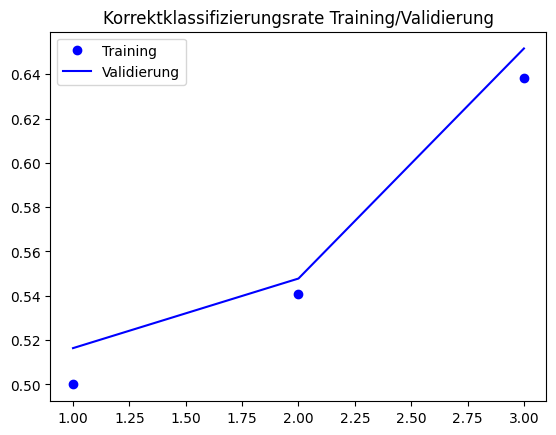

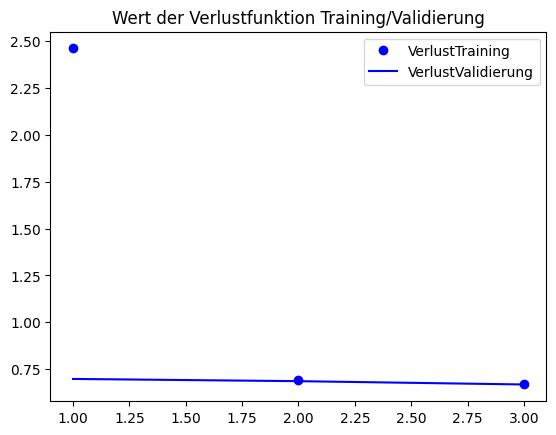

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
max_features=10000
max_len=500
epochs=3
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=sequence.pad_sequences(x_train,maxlen=max_len)
x_test=sequence.pad_sequences(x_test,maxlen=max_len)

model = Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPool1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,epochs=epochs,batch_size=128,validation_split=0.2)
epochs=range(1,len(acc)+1)
acc = list(acc)  # Convert to list if necessary
val_acc = list(val_acc)  # Repeat for loss and val_loss
loss = list(loss)  # Convert to list if necessary
val_loss = list(val_loss)
plt.plot(epochs,acc,'bo',label='Training')
plt.plot(epochs,val_acc,'b',label='Validierung')
plt.title('Korrektklassifizierungsrate Training/Validierung')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='VerlustTraining')
plt.plot(epochs,val_loss,'b',label='VerlustValidierung')
plt.title('Wert der Verlustfunktion Training/Validierung')
plt.legend()
plt.show()

